## 目录

### 1. 什么是CRS

### 2. 如何操作矢量数据的crs

### 3. 如何操作栅格数据的crs
# 

所有的地理信息数据都有一个 Coordinate Reference Systems （CRS），

用来确定与实际地球表面位置对应的两维坐标系

例如下面是通过映射方法确定 CRS 的主流方法：

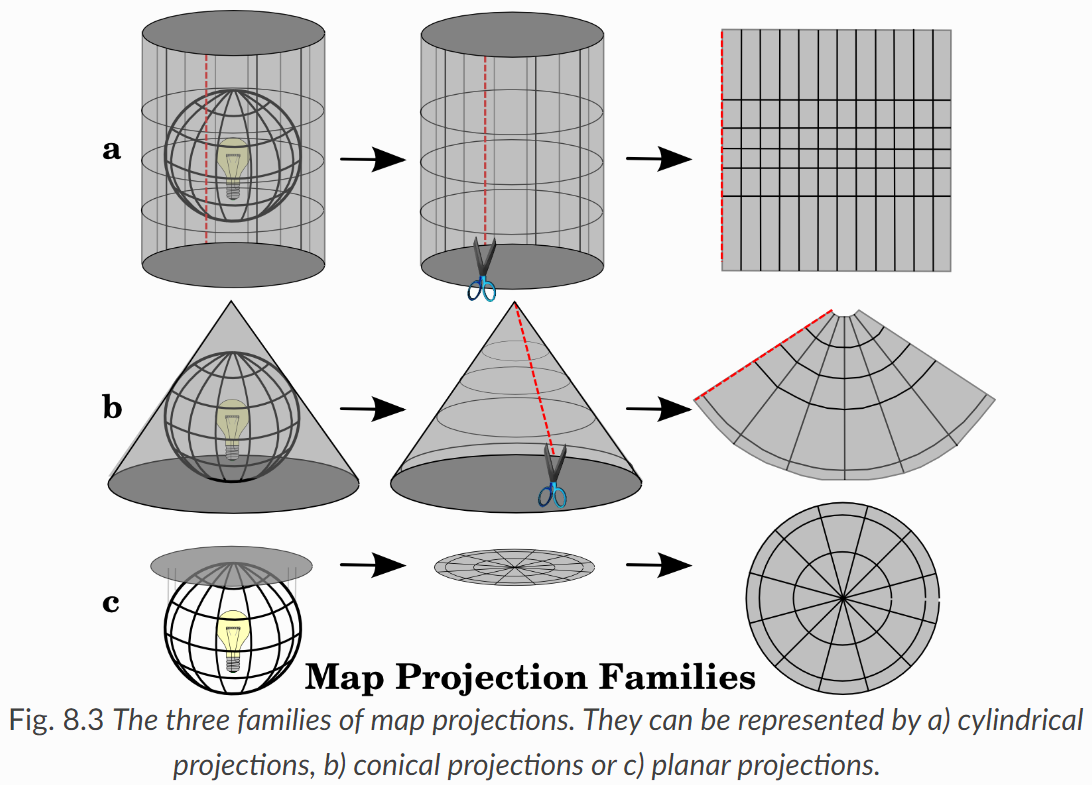

##### 根据crs，我们确定地图数据和现实地球的相对位置

In [1]:
library(tidyverse)
library(sf)
library(terra)
library(colorspace)

Warning message:
"程辑包'tidyverse'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'ggplot2'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'tibble'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'tidyr'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'readr'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'purrr'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'dplyr'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'stringr'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'forcats'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'lubridate'是用R版本4.2.3 来建造的"
-- Attaching core tidyverse packages ---------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<ht

In [2]:
setwd("C:/Users/77387/Desktop/Data_analysis_courses/RandSpecialAnalysis/Chapter8/")

In [3]:
county <- st_read("cb_2018_us_county_20m.shp", quiet = TRUE)
county <- county %>%
  mutate(state = as.numeric(as.character(STATEFP))) %>%
  filter(state != 2, state != 15, state < 60) 

该数据的 CRS 包含 EPSG（European Petroleum Survey Group）code， EPSG有一些列的geographic coordinate system选择，现在这套的id是4269
#### 其CRS 包含以下信息：

ELLIPSOID（椭圆体）地球形状的基本模型

datum（基准点）链接椭圆体和地球表面的对应点

（ELLIPSOID 和 datum 组成 geographic coordinate system）

经度和维度的坐标系通过地心到地表的角度衡量


In [19]:
st_crs(county)

Coordinate Reference System:
  User input: NAD83 
  wkt:
GEOGCRS["NAD83",
    DATUM["North American Datum 1983",
        ELLIPSOID["GRS 1980",6378137,298.257222101,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4269]]

### 操纵矢量数据的 CRS

In [20]:
county <- st_read("cb_2018_us_county_20m.shp", quiet = TRUE)
# 只去北美大陆（主体部分的州）
county <- county %>%
  mutate(state = as.numeric(as.character(STATEFP))) %>%
  filter(state != 2, state != 15, state < 60) 

##### 提取该数据的crs

In [21]:
st_crs(county)

Coordinate Reference System:
  User input: NAD83 
  wkt:
GEOGCRS["NAD83",
    DATUM["North American Datum 1983",
        ELLIPSOID["GRS 1980",6378137,298.257222101,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4269]]

##### 可视化

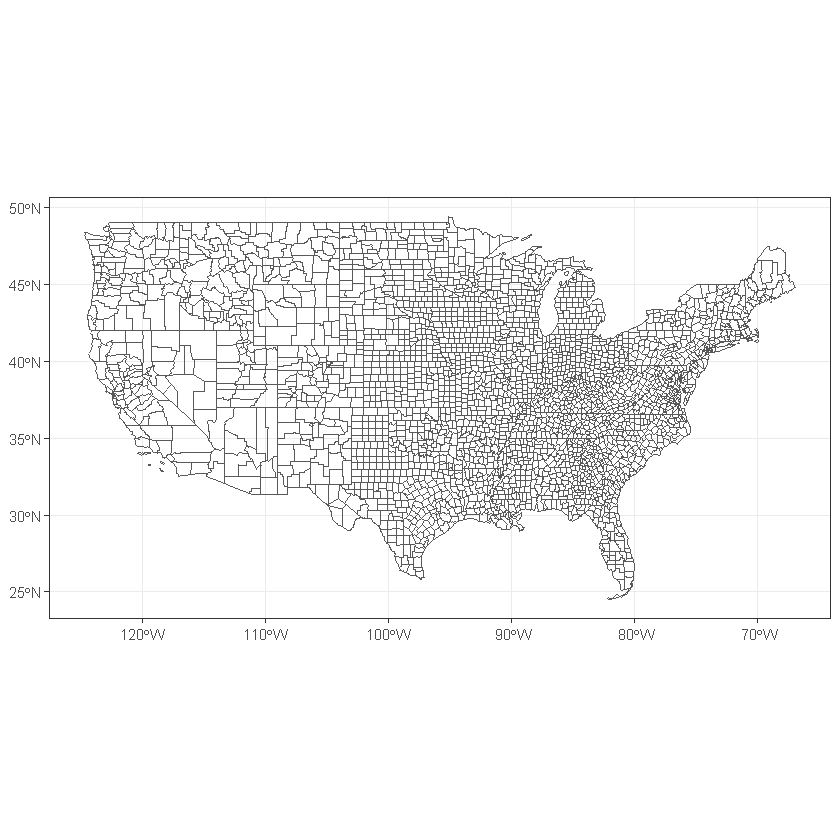

In [22]:
ggplot(data = county) +
  geom_sf(fill = NA) +
  theme_bw()

st_crs() 返回结构中提取映射名

In [23]:
st_crs(county)$Name

[1] "NAD83"

提取 EPSG code

In [24]:
st_crs(county)$epsg

[1] 4269

st_transform() 可以用来重新映射矢量数据

我们把该数据原来的“NAD83”，改为“EPSG”（5070）

In [25]:
county_aea <- st_transform(county, 5070)
writeLines(st_crs(county_aea)$WktPretty)

PROJCS["NAD83 / Conus Albers",
    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.257222101]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4269"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["latitude_of_center",23],
    PARAMETER["longitude_of_center",-96],
    PARAMETER["standard_parallel_1",29.5],
    PARAMETER["standard_parallel_2",45.5],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","5070"]]


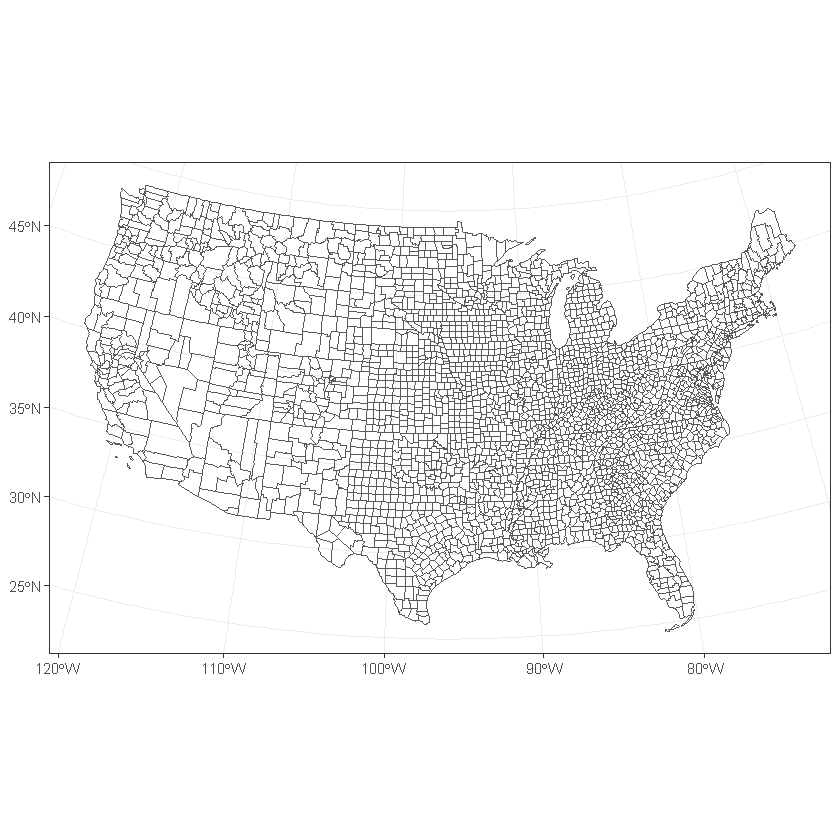

In [26]:
ggplot(data = county_aea) +
  geom_sf(fill = NA) +
  theme_bw()

我们可以直接使用 EPSG 里的的 crs，当然，如果不嫌麻烦也可以自己输入定义crs

EPSG 的网站：https://epsg.org/home.html

##### 如何自己手动输入所有的 crs 信息？
下面案例中输入的格式是 WKT version（well-known version）,我们需要按这种格式组合crs信息

In [27]:
badcrs_wkt <- 
'PROJCS["BadAlbers",
GEOGCS["NAD83",
  DATUM["North_American_Datum_1983",
    SPHEROID["GRS 1980",6378137,298.257222101]],
  PRIMEM["Greenwich",0],
  UNIT["degree",0.0174532925199433]],
PROJECTION["Albers_Conic_Equal_Area"],
PARAMETER["latitude_of_center",37.5],
PARAMETER["longitude_of_center",-96],
PARAMETER["standard_parallel_1",75],
PARAMETER["standard_parallel_2",80],
PARAMETER["false_easting",0],
PARAMETER["false_northing",0],
UNIT["metre",1],
AXIS["Easting",EAST],
AXIS["Northing",NORTH]]'

In [28]:
mybadcrs <- st_crs(badcrs_wkt)
county_bad <- st_transform(county, mybadcrs)

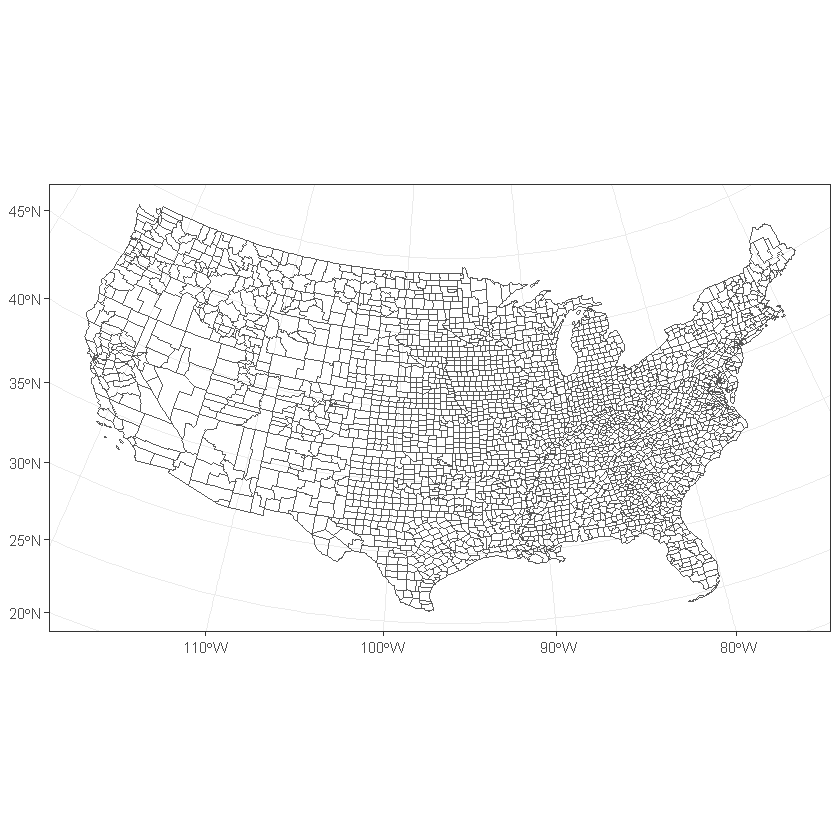

In [29]:
ggplot(data = county_bad) +
  geom_sf(fill = NA) +
  theme_bw()

##### 另外，我们还可以从另一个数据中取 crs，以更换原来 CRS 设置


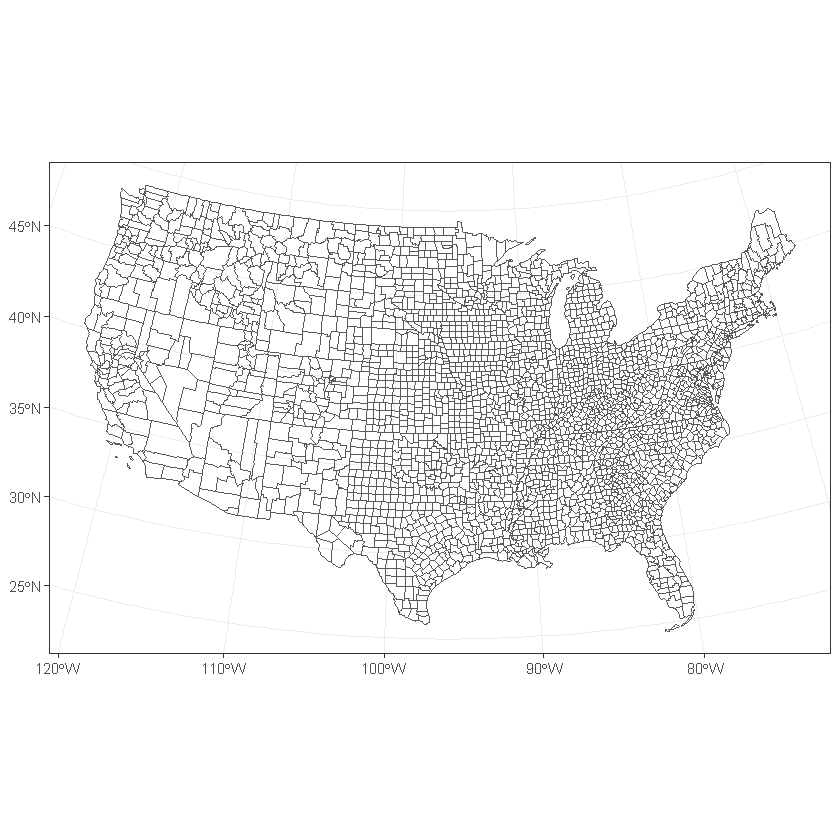

In [30]:
county_fixed <- st_transform(county_bad, st_crs(county_aea))
ggplot(data = county_fixed) +
  geom_sf(fill = NA) +
  theme_bw()

## 操纵栅格数据的 CRS

In [31]:
landcov <- rast("NLCD_2016_Land_Cover_Walton.tiff")

In [32]:
crs(landcov)

[1] "PROJCRS[\"Albers_Conical_Equal_Area\",\n    BASEGEOGCRS[\"NAD83\",\n        DATUM[\"North American Datum 1983\",\n            ELLIPSOID[\"GRS 1980\",6378137,298.257222101004,\n                LENGTHUNIT[\"metre\",1]]],\n        PRIMEM[\"Greenwich\",0,\n            ANGLEUNIT[\"degree\",0.0174532925199433]],\n        ID[\"EPSG\",4269]],\n    CONVERSION[\"Albers Equal Area\",\n        METHOD[\"Albers Equal Area\",\n            ID[\"EPSG\",9822]],\n        PARAMETER[\"Latitude of false origin\",23,\n            ANGLEUNIT[\"degree\",0.0174532925199433],\n            ID[\"EPSG\",8821]],\n        PARAMETER[\"Longitude of false origin\",-96,\n            ANGLEUNIT[\"degree\",0.0174532925199433],\n            ID[\"EPSG\",8822]],\n        PARAMETER[\"Latitude of 1st standard parallel\",29.5,\n            ANGLEUNIT[\"degree\",0.0174532925199433],\n            ID[\"EPSG\",8823]],\n        PARAMETER[\"Latitude of 2nd standard parallel\",45.5,\n            ANGLEUNIT[\"degree\",0.0174532925199433],\n            ID[\"EPSG\",8824]],\n        PARAMETER[\"Easting at false origin\",0,\n            LENGTHUNIT[\"metre\",1],\n            ID[\"EPSG\",8826]],\n        PARAMETER[\"Northing at false origin\",0,\n            LENGTHUNIT[\"metre\",1],\n            ID[\"EPSG\",8827]]],\n    CS[Cartesian,2],\n        AXIS[\"easting\",east,\n            ORDER[1],\n            LENGTHUNIT[\"metre\",1,\n                ID[\"EPSG\",9001]]],\n        AXIS[\"northing\",north,\n            ORDER[2],\n            LENGTHUNIT[\"metre\",1,\n                ID[\"EPSG\",9001]]]]"

使用 writeLines() 可以呈现地更规整

In [33]:
writeLines(crs(landcov))

PROJCRS["Albers_Conical_Equal_Area",
    BASEGEOGCRS["NAD83",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101004,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4269]],
    CONVERSION["Albers Equal Area",
        METHOD["Albers Equal Area",
            ID["EPSG",9822]],
        PARAMETER["Latitude of false origin",23,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8821]],
        PARAMETER["Longitude of false origin",-96,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8822]],
        PARAMETER["Latitude of 1st standard parallel",29.5,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8823]],
        PARAMETER["Latitude of 2nd standard parallel",45.5,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8824]],
        PARAMETER["Easting at false 

##### 使用上一节的案例：

In [35]:
oldclas <- unique(landcov)
newclas <- c(1, 2, 2, 2, 2, 3, 4, 4, 4, 5, 5, 5, 6, 7, 7)
lookup <- data.frame(oldclas, newclas)
landcov_rc <- classify(landcov, lookup)
newnames <- c("Water",
               "Developed",
               "Barren",
               "Forest",
               "GrassShrub",
               "Cropland",
               "Wetland")
newcols <- c("mediumblue", 
             "red2", 
             "gray60", 
             "darkgreen", 
             "yellow2", 
             "orange4", 
             "paleturquoise2")
newcols2 <- desaturate(newcols, amount = 0.3)

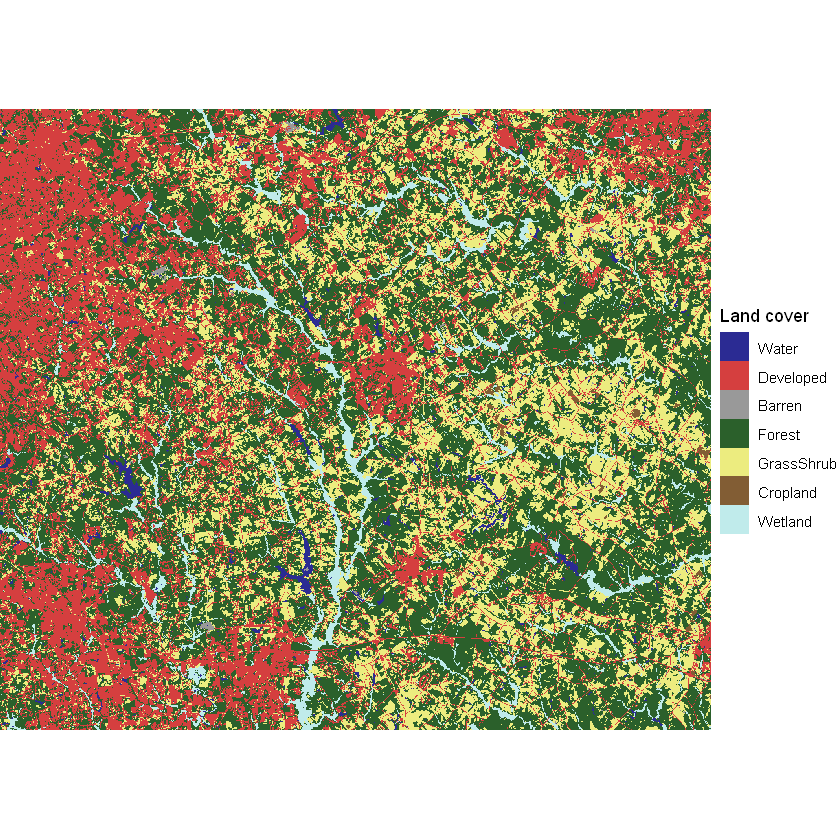

In [36]:
source("rasterdf.R")
landcov_df <- rasterdf(landcov_rc)

ggplot(data = landcov_df) +
  geom_raster(aes(x = x, 
                  y = y, 
                  fill = as.character(value))) + 
  scale_fill_manual(name = "Land cover",
                    values = newcols2,
                    labels = newnames,
                    na.translate = FALSE) +
  coord_sf(expand = FALSE) +
  theme_void()

In [37]:
landcov_utm <- project(landcov_rc, "epsg:26917", 
                       method = "near",
                       res = 30)
crs(landcov_utm, describe = TRUE)$name

[1] "NAD83 / UTM zone 17N"

In [38]:
nrow(landcov_utm)

[1] 1828

In [39]:
ncol(landcov_utm)

[1] 2047

In [40]:
res(landcov_utm)

[1] 30 30

Warning message:
"Removed 883216 rows containing missing values (`geom_raster()`)."


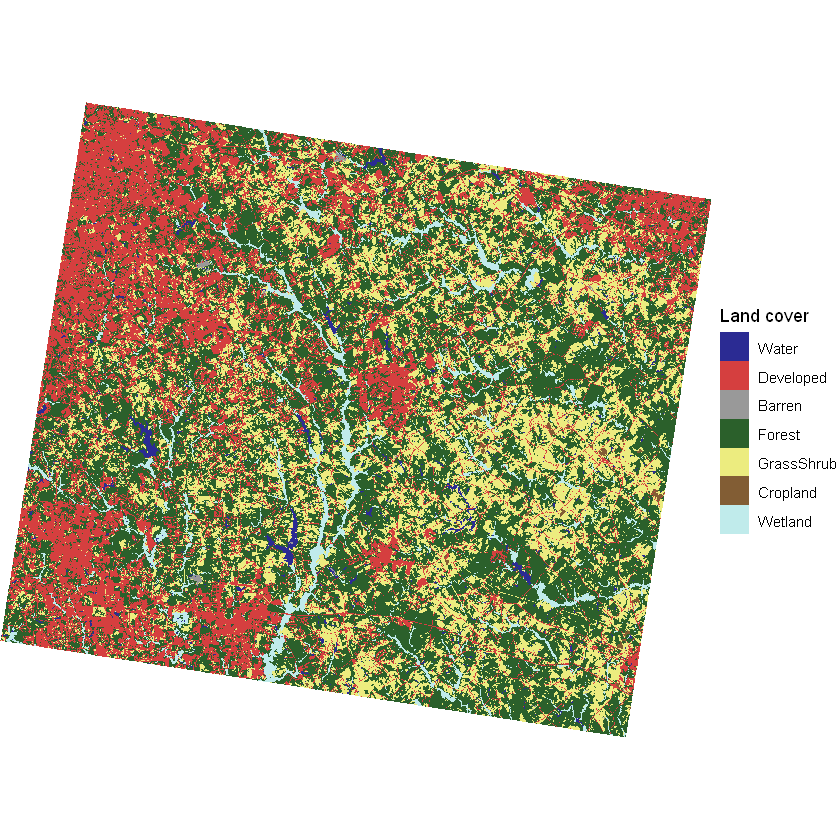

In [41]:
landcovutm_df <- rasterdf(landcov_utm)
ggplot(data = landcovutm_df) +
  geom_raster(aes(x = x, 
                  y = y, 
                  fill = as.character(value))) + 
  scale_fill_manual(name = "Land cover",
                    values = newcols2,
                    labels = newnames,
                    na.translate = FALSE) +
  coord_sf(expand = FALSE) +
  theme_void()